In [2]:
pip install osmnx matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --upgrade osmnx


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import osmnx as ox

place_name = "London, England, United Kingdom"
gdf = ox.geocode_to_gdf(place_name)

if not gdf.empty:
    boundary_polygon = gdf.geometry.values[0]
    print("Successfully fetched London boundary!")
else:
    print("No valid polygon found for London.")


Successfully fetched London boundary!


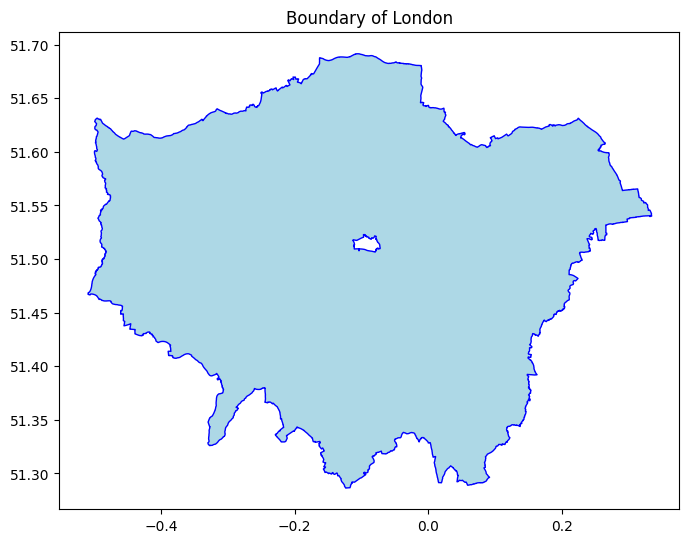

In [5]:
import matplotlib.pyplot as plt

# Plot the boundary of London
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='lightblue', edgecolor='blue')
plt.title("Boundary of London")
plt.show()


Boundary polygon for London:
POLYGON ((-0.5103751 51.4680873, -0.5103637 51.4679522, -0.5103384 51.4678449, -0.5102994 51.4677599, -0.5102962 51.4675045, -0.5095162 51.4673606, -0.5094275 51.4673441, -0.5091468 51.4672111, -0.5088008 51.4670944, -0.5084938 51.4670581, -0.5083445 51.4670463, -0.5081545 51.4670466, -0.5079099 51.4670417, -0.507822 51.4670415, -0.5077577 51.467028, -0.5077029 51.4670283, -0.5074048 51.466948, -0.5073366 51.4669165, -0.5071698 51.4670871, -0.5070457 51.4671835, -0.5069352 51.4673521, -0.5069171 51.4673743, -0.5068978 51.4673957, -0.5068769 51.4674161, -0.5068547 51.4674365, -0.5068324 51.4674569, -0.5068087 51.4674763, -0.506788 51.4674922, -0.506763 51.4675108, -0.5067379 51.4675294, -0.5067099 51.467547, -0.506682 51.4675646, -0.5066541 51.4675813, -0.5066248 51.467598, -0.506594 51.4676129, -0.5065619 51.4676278, -0.5065298 51.4676419, -0.5065151 51.467648, -0.506486 51.4676593, -0.5064554 51.4676697, -0.5064249 51.4676792, -0.5063944 51.4676878, -0.506

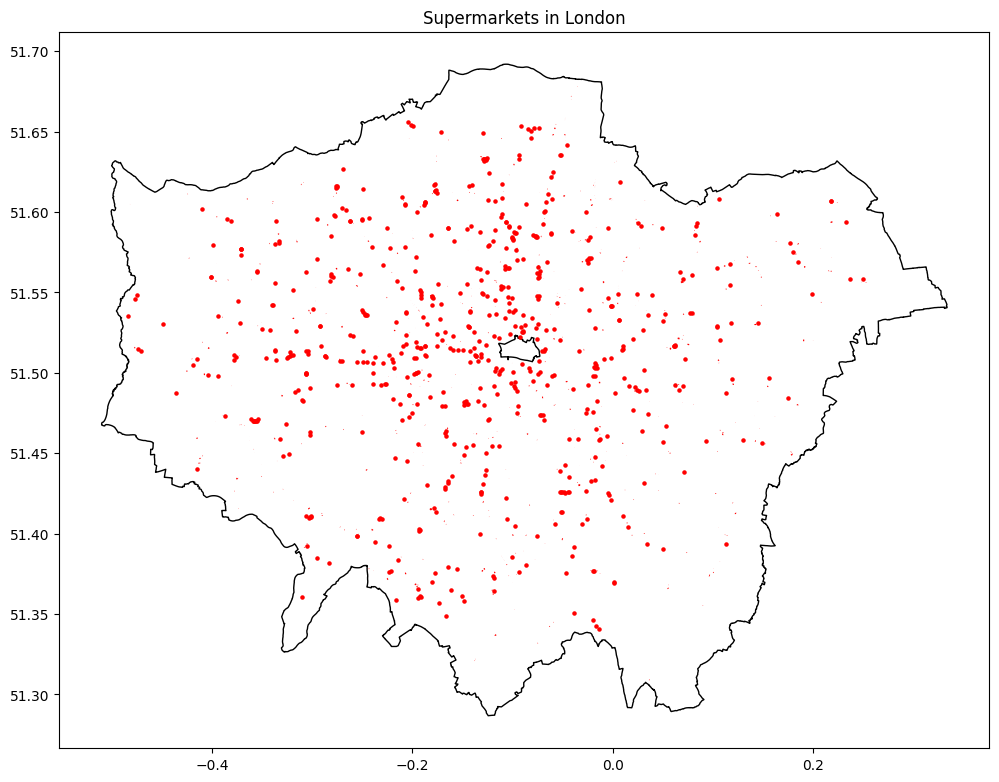

In [7]:
import osmnx as ox
import matplotlib.pyplot as plt

# Step 1: Get the boundary polygon for London
boundary_gdf = ox.geocode_to_gdf("London, England, United Kingdom")
boundary_polygon = boundary_gdf.geometry.values[0]

print("Boundary polygon for London:")
print(boundary_polygon)
print(type(boundary_polygon))

# Step 2: Define the tags for supermarkets
tags = {"shop": "supermarket"}

# Step 3: Retrieve supermarkets within the London polygon
supermarkets = ox.features.features_from_polygon(boundary_polygon, tags)

# Step 4: Inspect the retrieved data
print(supermarkets.head())

# Step 5: Visualize the supermarkets
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the London boundary
boundary_gdf.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot the supermarkets
supermarkets.plot(ax=ax, color='red', markersize=5)

plt.title('Supermarkets in London')
plt.show()


In [8]:
import requests
import pandas as pd

# Define the Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# Overpass QL query to get all supermarkets in Greater London
overpass_query = """
[out:json][timeout:120];
area["name"="Greater London"]["boundary"="administrative"]->.searchArea;
(
  node["shop"="supermarket"](area.searchArea);
  way["shop"="supermarket"](area.searchArea);
  relation["shop"="supermarket"](area.searchArea);
);
out center;
"""

# Send the request to the Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
else:
    print(f"Error: {response.status_code}")
    exit()

# Process the data
elements = data['elements']
supermarkets = []
for el in elements:
    tags = el.get('tags', {})
    name = tags.get('name', 'Unnamed')
    if el['type'] == 'node':
        lat = el.get('lat')
        lon = el.get('lon')
    elif 'center' in el:
        lat = el['center']['lat']
        lon = el['center']['lon']
    else:
        lat = None
        lon = None
    supermarkets.append({
        'name': name,
        'latitude': lat,
        'longitude': lon,
        'osm_id': el.get('id')
    })

# Create a DataFrame
df = pd.DataFrame(supermarkets)

# Save to CSV
# df.to_csv('london_supermarkets.csv', index=False)

print(f"Saved data to 'london_supermarkets.csv'. Found {len(df)} supermarkets.")


Saved data to 'london_supermarkets.csv'. Found 1225 supermarkets.


# Onto the map

In [9]:
supermarkets = pd.read_csv('london_supermarkets.csv')
foodbanks = pd.read_csv('givefood_foodbanks.csv')

print(f"Number of supermarkets: {len(supermarkets)}")
print(f"Number of food banks: {len(foodbanks)}")

Number of supermarkets: 1225
Number of food banks: 2825


In [10]:
# Now we need the London boundary polygon to filter the data
place_name = "London, England, United Kingdom"
gdf = ox.geocode_to_gdf(place_name)

if not gdf.empty:
    boundary_polygon = gdf.geometry.values[0]
    print("Successfully fetched London boundary!")

print(supermarkets.columns)
print(foodbanks.columns)

Successfully fetched London boundary!
Index(['name', 'latitude', 'longitude', 'osm_id'], dtype='object')
Index(['organisation_name', 'organisation_alt_name', 'organisation_slug',
       'location_name', 'location_slug', 'url', 'shopping_list_url', 'rss_url',
       'phone_number', 'secondary_phone_number', 'email', 'address',
       'postcode', 'country', 'lat_lng', 'place_id', 'plus_code_compound',
       'plus_code_global', 'lsoa', 'msoa', 'parliamentary_constituency',
       'mp_parliamentary_id', 'mp', 'mp_party', 'ward', 'district',
       'charity_number', 'charity_register_url', 'network', 'created',
       'modified', 'edited', 'need_id', 'needed_items', 'excess_items',
       'need_found'],
      dtype='object')


In [11]:
# Split the 'lat_lng' column into 'latitude' and 'longitude' columns
foodbanks[['latitude', 'longitude']] = foodbanks['lat_lng'].str.split(',', expand=True)

# Remove any leading/trailing whitespaces and convert to float
foodbanks['latitude'] = foodbanks['latitude'].str.strip().astype(float)
foodbanks['longitude'] = foodbanks['longitude'].str.strip().astype(float)



In [12]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 1: Obtain London's boundary polygon
london_boundary = ox.geocode_to_gdf('Greater London, United Kingdom')

# Optional: Visualize the boundary
# london_boundary.plot()
# plt.show()

# Step 2: Parse 'lat_lng' into 'latitude' and 'longitude'
foodbanks[['latitude', 'longitude']] = foodbanks['lat_lng'].str.split(',', expand=True)
foodbanks['latitude'] = foodbanks['latitude'].astype(float)
foodbanks['longitude'] = foodbanks['longitude'].astype(float)

# Step 3: Create GeoDataFrame for foodbanks
foodbanks['geometry'] = [Point(xy) for xy in zip(foodbanks['longitude'], foodbanks['latitude'])]
foodbanks_gdf = gpd.GeoDataFrame(foodbanks, geometry='geometry', crs='EPSG:4326')

# Step 4: Ensure CRS match
foodbanks_gdf = foodbanks_gdf.to_crs(london_boundary.crs)

# Step 5: Spatial join to filter foodbanks within London
foodbanks_in_london = gpd.sjoin(foodbanks_gdf, london_boundary, how='inner', predicate='within')
foodbanks_in_london = foodbanks_in_london.drop(columns=['index_right'])

# Step 6: Results
print(f"Total foodbanks: {len(foodbanks_gdf)}")
print(f"Foodbanks within London: {len(foodbanks_in_london)}")

# Step 7: Save or use the filtered data
# foodbanks_in_london.to_csv('foodbanks_in_london.csv', index=False)


Total foodbanks: 2825
Foodbanks within London: 249


In [13]:
foodbanks_in_london

,organisation_name,organisation_alt_name,organisation_slug,location_name,location_slug,url,shopping_list_url,rss_url,phone_number,secondary_phone_number,...,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
3,3food4u,NaN,3food4u,Bruce Grove,bruce-grove,https://3food4u.org,https://3food4u.org,NaN,01992842642,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
7,3food4u,NaN,3food4u,Tottenham SDA,tottenham-sda,https://3food4u.org,https://3food4u.org,NaN,01992842642,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
30,AFRIL,NaN,afril,NaN,NaN,http://www.afril.org.uk/food-bank/,http://www.afril.org.uk/food-bank/,NaN,02082974111,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
58,Arc Centre,NaN,arc-centre,NaN,NaN,https://www.thearccentre.org/foodbank,https://www.thearccentre.org/foodbank,NaN,07727157138,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
86,AY Group,NaN,ay-group,NaN,NaN,https://www.ay-group.org,https://www.ay-group.org,NaN,02073818502,7.538378e+09,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,Wimbledon,NaN,wimbledon,Morden Baptist Church,morden-baptist-church,https://wimbledon.foodbank.org.uk,https://wimbledon.foodbank.org.uk/give-help/do...,https://wimbledon.foodbank.org.uk/feed/,02085440126,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
2760,Wimbledon,NaN,wimbledon,Pollards Hill Baptist Church,pollards-hill-baptist-church,https://wimbledon.foodbank.org.uk,https://wimbledon.foodbank.org.uk/give-help/do...,https://wimbledon.foodbank.org.uk/feed/,02085440126,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
2814,Yiewsley & West Drayton,NaN,yiewsley-west-drayton,NaN,NaN,https://yiewsleywestdrayton.foodbank.org.uk,https://yiewsleywestdrayton.foodbank.org.uk/gi...,https://yiewsleywestdrayton.foodbank.org.uk/feed/,07462097357,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"
2815,Yiewsley & West Drayton,NaN,yiewsley-west-drayton,Bell Farm Christian Centre,bell-farm-christian-centre,https://yiewsleywestdrayton.foodbank.org.uk,https://yiewsleywestdrayton.foodbank.org.uk/gi...,https://yiewsleywestdrayton.foodbank.org.uk/feed/,01895444406,NaN,...,175342,51.489334,-0.144055,boundary,administrative,10,0.671128,state_district,Greater London,"Greater London, England, United Kingdom"


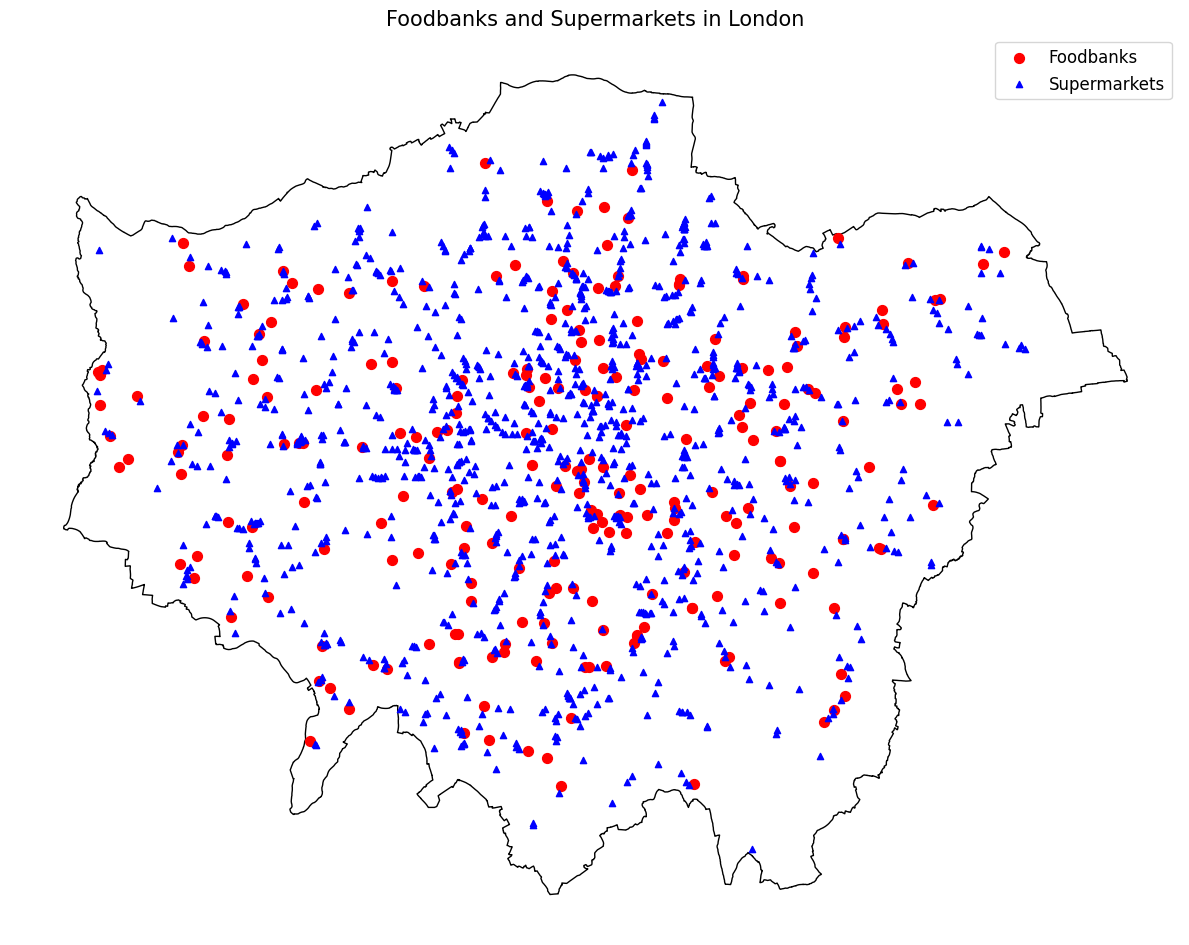

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Prepare the Data

# Ensure foodbanks data is a GeoDataFrame
if not isinstance(foodbanks_in_london, gpd.GeoDataFrame):
    foodbanks_in_london['geometry'] = [Point(xy) for xy in zip(foodbanks_in_london['longitude'], foodbanks_in_london['latitude'])]
    foodbanks_gdf = gpd.GeoDataFrame(foodbanks_in_london, geometry='geometry', crs='EPSG:4326')
else:
    foodbanks_gdf = foodbanks_in_london

# Prepare supermarkets data
supermarkets['geometry'] = [Point(xy) for xy in zip(supermarkets['longitude'], supermarkets['latitude'])]
supermarkets_gdf = gpd.GeoDataFrame(supermarkets, geometry='geometry', crs='EPSG:4326')

# Ensure CRS match
london_boundary = london_boundary.to_crs('EPSG:4326')
foodbanks_gdf = foodbanks_gdf.to_crs('EPSG:4326')
supermarkets_gdf = supermarkets_gdf.to_crs('EPSG:4326')

# Step 2: Plot the Data

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot London boundary
london_boundary.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Plot foodbanks
foodbanks_gdf.plot(ax=ax, 
                   markersize=50, 
                   color='red', 
                   marker='o', 
                   label='Foodbanks')

# Plot supermarkets
supermarkets_gdf.plot(ax=ax, 
                      markersize=20, 
                      color='blue', 
                      marker='^', 
                      label='Supermarkets')

# Add legend
plt.legend(prop={'size': 12})

# Add title
plt.title('Foodbanks and Supermarkets in London', fontsize=15)

# Remove axes
ax.set_axis_off()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
import pandas as pd
import geopandas as gpd

# Step 1: Prepare the Foodbanks DataFrame

# Extract latitude and longitude if necessary
if 'latitude' not in foodbanks_in_london.columns or 'longitude' not in foodbanks_in_london.columns:
    foodbanks_in_london['longitude'] = foodbanks_in_london.geometry.x
    foodbanks_in_london['latitude'] = foodbanks_in_london.geometry.y

# Add 'type' column
foodbanks_in_london['type'] = 'Foodbank'

# Ensure 'name' column exists
# If the 'name' column is missing or named differently, adjust accordingly
# For this example, we'll proceed assuming 'name' exists

# Create subset
foodbanks_subset = foodbanks_in_london[['name', 'latitude', 'longitude', 'type']].copy()

# Step 2: Prepare the Supermarkets DataFrame

# Extract latitude and longitude if necessary
if 'latitude' not in supermarkets_gdf.columns or 'longitude' not in supermarkets_gdf.columns:
    supermarkets_gdf['longitude'] = supermarkets_gdf.geometry.x
    supermarkets_gdf['latitude'] = supermarkets_gdf.geometry.y

# Add 'type' column
supermarkets_gdf['type'] = 'Supermarket'

# Ensure 'name' column exists
# For this example, we'll proceed assuming 'name' exists

# Create subset
supermarkets_subset = supermarkets_gdf[['name', 'latitude', 'longitude', 'type']].copy()

# Step 3: Combine the DataFrames
combined_df = pd.concat([foodbanks_subset, supermarkets_subset], ignore_index=True)

# Step 4: Verify the Combined DataFrame
print(combined_df.head())

# Step 5: (Optional) Save to CSV
combined_df.to_csv('combined_locations.csv', index=False)


             name   latitude  longitude      type
0  Greater London  51.592369  -0.069795  Foodbank
1  Greater London  51.586079  -0.085825  Foodbank
2  Greater London  51.454141   0.021968  Foodbank
3  Greater London  51.535927  -0.095991  Foodbank
4  Greater London  51.485256  -0.201715  Foodbank


In [16]:
foodbanks_subset = foodbanks_in_london[['organisation_name', 'latitude', 'longitude', 'type']].copy()
foodbanks_subset

,organisation_name,latitude,longitude,type
3,3food4u,51.592369,-0.069795,Foodbank
7,3food4u,51.586079,-0.085825,Foodbank
30,AFRIL,51.454141,0.021968,Foodbank
58,Arc Centre,51.535927,-0.095991,Foodbank
86,AY Group,51.485256,-0.201715,Foodbank
...,...,...,...,...
2759,Wimbledon,51.401670,-0.195935,Foodbank
2760,Wimbledon,51.402049,-0.134962,Foodbank
2814,Yiewsley & West Drayton,51.513079,-0.473171,Foodbank
2815,Yiewsley & West Drayton,51.501681,-0.458918,Foodbank


In [70]:
foodbannks = pd.read_csv('givefood_foodbanks.csv')
demand = pd.read_csv('givefood_items.csv', index_col=0)

In [71]:
demand['created'] = pd.to_datetime(demand['created'])

# Only keep values in 2024
demand = demand[demand['created'].dt.year == 2024]

# sort by organisation name
demand = demand.sort_values(by='organisation_name')

# only keep need in the type column
demand = demand[demand['type'] == 'need']

demand

,organisation_alt_name,organisation_slug,network,country,lat_lng,type,item,category,group,created
organisation_name,,,,,,,,,,
AFECC,NaN,afecc,IFAN,Scotland,"55.83479500000001,-4.262617",need,Canned Vegetables,Tinned Vegetables,Meal Food,2024-08-01 17:40:08.587491
AFECC,NaN,afecc,IFAN,Scotland,"55.83479500000001,-4.262617",need,Canned Soups,Soup,Meal Food,2024-08-01 17:40:08.587491
AFECC,NaN,afecc,IFAN,Scotland,"55.83479500000001,-4.262617",need,Pasties,Other,Other,2024-08-01 17:40:08.587491
AFECC,NaN,afecc,IFAN,Scotland,"55.83479500000001,-4.262617",need,Bread,Other,Other,2024-08-01 17:40:08.587491
AFECC,NaN,afecc,IFAN,Scotland,"55.83479500000001,-4.262617",need,Desserts,Dessert,Meal Food,2024-08-01 17:40:08.587491
...,...,...,...,...,...,...,...,...,...,...
York,NaN,york,Trussell,England,"53.9901632,-1.0982665",need,Laundry Detergent,Laundry,Cleaning,2024-11-02 15:03:35.617869
York,NaN,york,Trussell,England,"53.9901632,-1.0982665",need,Toothpaste,Toothpaste/Mouthwash,Toiletries,2024-11-02 15:03:35.617869
York,NaN,york,Trussell,England,"53.9901632,-1.0982665",need,Shaving Foam And Disposable Razors,Toiletries,Toiletries,2024-11-02 15:03:35.617869


## Making the assumption above that each item costs ~1, can google and see median is 2-3 pounds

In [72]:
len(demand["item"].unique())

6312

In [73]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Assuming 'foodbanks_subset' and 'demand' DataFrames are already defined

# Step 1: Extract latitude and longitude from 'lat_lng' column in 'demand' DataFrame
demand[['latitude', 'longitude']] = demand['lat_lng'].str.split(',', expand=True).astype(float)

# Step 2: Rename the latitude and longitude columns for clarity
demand.rename(columns={'latitude': 'latitude_demand', 'longitude': 'longitude_demand'}, inplace=True)
foodbanks_subset.rename(columns={'latitude': 'latitude_foodbank', 'longitude': 'longitude_foodbank'}, inplace=True)

# Step 3: Reset index on 'demand' DataFrame to make 'organisation_name' a column
demand_reset = demand.reset_index()

# Step 4: Merge DataFrames on 'organisation_name'
merged_df = pd.merge(
    demand_reset,
    foodbanks_subset,
    on='organisation_name',
    how='inner'
)

# Step 5: Define Haversine distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distances = R * c
    return distances

# Step 6: Calculate distances between demand and foodbank locations
merged_df['distance'] = haversine_distance(
    merged_df['latitude_demand'],
    merged_df['longitude_demand'],
    merged_df['latitude_foodbank'],
    merged_df['longitude_foodbank']
)

# Step 7: Filter matches based on proximity (e.g., within 5 km)
distance_threshold = 1  # kilometers
filtered_df = merged_df[merged_df['distance'] <= distance_threshold]

# Step 8: Aggregate the demand for each foodbank location
demand_per_foodbank = filtered_df.groupby(
    ['organisation_name', 'latitude_foodbank', 'longitude_foodbank']
).size().reset_index(name='demand_count')

# Step 9: Merge the demand counts back into 'foodbanks_subset'
foodbanks_with_demand = pd.merge(
    foodbanks_subset,
    demand_per_foodbank,
    on=['organisation_name', 'latitude_foodbank', 'longitude_foodbank'],
    how='left'
)

# Fill NaN values in 'demand_count' with 0
foodbanks_with_demand['demand_count'] = foodbanks_with_demand['demand_count'].fillna(0)

# The 'foodbanks_with_demand' DataFrame now contains the demand counts for each foodbank


In [74]:
supermarkets_subset

,name,latitude,longitude,type,geometry,demand_count
0,M&S Foodhall,51.537810,-0.142041,Supermarket,POINT (-0.1420408 51.53781),None
1,Waitrose,51.516345,-0.187258,Supermarket,POINT (-0.1872577 51.5163445),None
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,POINT (-0.3197216 51.551496),None
3,Co-op Food,51.365198,-0.161079,Supermarket,POINT (-0.1610793 51.3651976),None
4,Iceland,51.606668,0.218460,Supermarket,POINT (0.2184595 51.6066678),None
...,...,...,...,...,...,...
1220,Co-op Food,51.577587,0.027006,Supermarket,POINT (0.0270061 51.5775868),None
1221,Waitrose,51.519352,-0.152107,Supermarket,POINT (-0.1521071 51.5193524),None
1222,Sainsbury's,51.461915,-0.084981,Supermarket,POINT (-0.0849808 51.461915),None
1223,Asda,51.565937,0.143182,Supermarket,POINT (0.1431825 51.5659366),None


In [62]:
foodbanks_with_demand

,organisation_name,latitude_foodbank,longitude_foodbank,type,demand_count
0,3food4u,51.592369,-0.069795,Foodbank,0.0
1,3food4u,51.586079,-0.085825,Foodbank,0.0
2,AFRIL,51.454141,0.021968,Foodbank,0.0
3,Arc Centre,51.535927,-0.095991,Foodbank,6.0
4,AY Group,51.485256,-0.201715,Foodbank,5.0
...,...,...,...,...,...
244,Wimbledon,51.401670,-0.195935,Foodbank,0.0
245,Wimbledon,51.402049,-0.134962,Foodbank,0.0
246,Yiewsley & West Drayton,51.513079,-0.473171,Foodbank,55.0
247,Yiewsley & West Drayton,51.501681,-0.458918,Foodbank,0.0


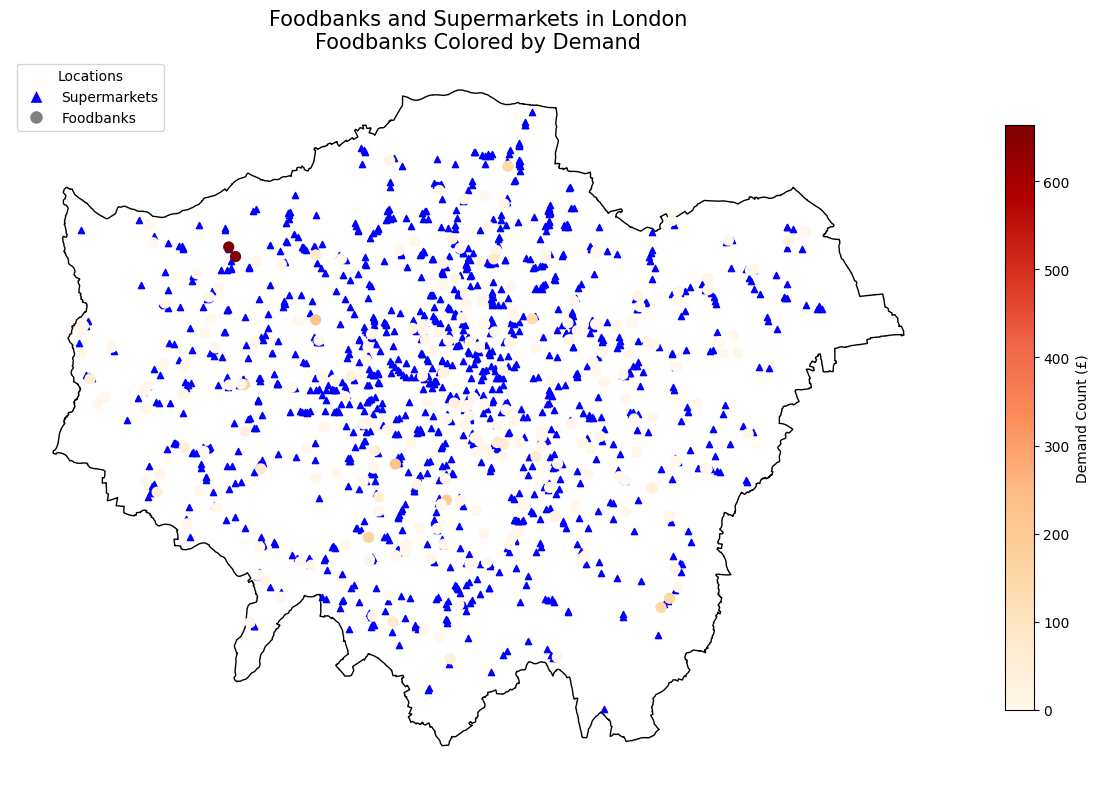

In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Prepare the Data

# Ensure 'foodbanks_with_demand' is a GeoDataFrame
if not isinstance(foodbanks_with_demand, gpd.GeoDataFrame):
    foodbanks_with_demand['geometry'] = [Point(xy) for xy in zip(foodbanks_with_demand['longitude_foodbank'], foodbanks_with_demand['latitude_foodbank'])]
    foodbanks_gdf = gpd.GeoDataFrame(foodbanks_with_demand, geometry='geometry', crs='EPSG:4326')
else:
    foodbanks_gdf = foodbanks_with_demand

# Ensure 'supermarkets_subset' is a GeoDataFrame
if not isinstance(supermarkets_subset, gpd.GeoDataFrame):
    supermarkets_subset['geometry'] = [Point(xy) for xy in zip(supermarkets_subset['longitude'], supermarkets_subset['latitude'])]
    supermarkets_gdf = gpd.GeoDataFrame(supermarkets_subset, geometry='geometry', crs='EPSG:4326')
else:
    supermarkets_gdf = supermarkets_subset

# Ensure CRS match
london_boundary = london_boundary.to_crs('EPSG:4326')
foodbanks_gdf = foodbanks_gdf.to_crs('EPSG:4326')
supermarkets_gdf = supermarkets_gdf.to_crs('EPSG:4326')

# Step 2: Plot the Data

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot London boundary
london_boundary.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Plot supermarkets
supermarkets_gdf.plot(ax=ax, 
                      markersize=20, 
                      color='blue', 
                      marker='^', 
                      # Remove label to prevent duplicate legend entries
                      # label='Supermarkets'
                      )

# Plot foodbanks with demand as color map
foodbanks_plot = foodbanks_gdf.plot(ax=ax, 
                                    markersize=50, 
                                    column='demand_count',  # Use 'demand_count' for color mapping
                                    cmap='OrRd',          # Changed color map to 'YlGnBu' (Yellow-Green-Blue)
                                    legend=True,            # Show legend (color bar)
                                    legend_kwds={'label': "Demand Count (£)", 'shrink': 0.5},  # Customize legend
                                    marker='o')

# Add custom legend entries
from matplotlib.lines import Line2D

# Create custom legend handles
supermarket_handle = Line2D([], [], marker='^', color='w', markerfacecolor='blue', markersize=10, label='Supermarkets')
foodbank_handle = Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Foodbanks')

# Combine legend handles
legend_handles = [supermarket_handle, foodbank_handle]

# Add the legend to the plot
ax.legend(handles=legend_handles, title='Locations', loc='upper left')

# Add title
plt.title('Foodbanks and Supermarkets in London\nFoodbanks Colored by Demand', fontsize=15)

# Remove axes
ax.set_axis_off()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Proportional mean to sample the demand for each supermarket

# Find demand for supermarket based on area

In [98]:
import geopandas as gpd
import pandas as pd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the GeoJSON file directly from the URL
geojson_url = 'https://github.com/martinjc/UK-GeoJSON/blob/master/json/administrative/eng/lad.json?raw=true'
gdf_boroughs = gpd.read_file(geojson_url)

boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", "City of London", "Croydon",
    "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", 
    "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# Filter the GeoDataFrame to include only the London boroughs
gdf_london = gdf_boroughs[gdf_boroughs['LAD13NM'].isin(boroughs)]

spending_values = [
    249.55, 623.70, 266.93, 504.57, 628.61, 1627.08, 36.24, 832.83,
    763.69, 317.73, 481.42, 451.62, 894.34, 250.95, 468.56, 236.15,
    975.12, 596.55, 755.53, 714.16, 504.39, 772.13, 530.12, 423.88,
    625.13, 279.99, 523.05, 952.85, 469.89, 1184.48, 274.26, 1070.51, 1626.71
]

# Create a DataFrame for the spending data
spending_df = pd.DataFrame({
    'borough': boroughs,
    'spending': spending_values
})

# Clean borough names in both DataFrames to ensure they match
gdf_london['LAD13NM_clean'] = gdf_london['LAD13NM'].str.lower().str.strip()
spending_df['borough_clean'] = spending_df['borough'].str.lower().str.strip()

# Correct mismatches in borough names
spending_df['borough_clean'] = spending_df['borough_clean'].replace({
    'hammersmith and fulham': 'hammersmith and fulham',
})

gdf_london['LAD13NM_clean'] = gdf_london['LAD13NM_clean'].replace({
    'city of london corporation': 'city of london',
    'westminster city council': 'westminster',
})

# # Merge the spending data with the GeoDataFrame
# merged_df = gdf_london.merge(
#     spending_df,
#     left_on='LAD13NM_clean',
#     right_on='borough_clean'
# )


# Assuming df1 is your first DataFrame and df2 is your second DataFrame

# Merge the DataFrames on the clean borough names
merged_df = pd.merge(gdf_london, spending_df, left_on='LAD13NM_clean', right_on='borough_clean')

# Select only the required columns
final_df = merged_df[['LAD13NM', 'geometry', 'spending']]

final_df


/home/jack/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/jack/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,LAD13NM,geometry,spending
0,City of London,"POLYGON ((-0.09679 51.52332, -0.09647 51.52282...",36.24
1,Barking and Dagenham,"MULTIPOLYGON (((0.07103 51.53715, 0.07292 51.5...",249.55
2,Barnet,"POLYGON ((-0.19903 51.6682, -0.19664 51.66814,...",623.70
3,Bexley,"MULTIPOLYGON (((0.19927 51.4584, 0.19888 51.45...",266.93
4,Brent,"POLYGON ((-0.26716 51.60037, -0.25977 51.59417...",504.57
5,Bromley,"POLYGON ((0.04518 51.4366, 0.04515 51.43622, 0...",628.61
6,Camden,"POLYGON ((-0.16737 51.57297, -0.1643 51.5725, ...",1627.08
7,Croydon,"POLYGON ((-0.10937 51.42316, -0.10599 51.42258...",832.83
8,Ealing,"POLYGON ((-0.32702 51.55501, -0.31778 51.55162...",763.69
9,Enfield,"POLYGON ((-0.09956 51.69111, -0.0948 51.69011,...",317.73


In [103]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# For reproducibility of the random samples
np.random.seed(0)

# --- Step 1: Prepare the Data ---

# Assuming 'boroughs_df' is your first DataFrame with borough data
# and 'stores_df' is your second DataFrame with store data

# Convert 'stores_df' into a GeoDataFrame
supermarkets_subset['geometry'] = gpd.points_from_xy(supermarkets_subset['longitude'], supermarkets_subset['latitude'])
stores_gdf = gpd.GeoDataFrame(supermarkets_subset, geometry='geometry')

# Ensure both GeoDataFrames have the same Coordinate Reference System (CRS)
# WGS84 Latitude/Longitude: EPSG:4326
stores_gdf.set_crs(epsg=4326, inplace=True)
final_df.set_crs(epsg=4326, inplace=True)

# Optional: Validate and clean borough geometries
final_df['geometry'] = final_df['geometry'].buffer(0)

# --- Step 2: Perform a Spatial Join ---

# Spatially join stores with boroughs to find which borough each store is in
stores_in_boroughs = gpd.sjoin(
    stores_gdf,
    final_df[['LAD13NM', 'geometry', 'spending']],
    how='left',
    predicate='within'
)

# --- Step 3: Generate Demand Counts ---

# Define a function to sample from the normal distribution
def sample_demand(spending_value):
    if pd.isnull(spending_value) or spending_value <= 0:
        return None  # Cannot sample without a valid spending value
    variance = spending_value * 0.1
    std_dev = np.sqrt(variance)
    sample = np.random.normal(loc=spending_value, scale=std_dev)
    return max(sample, 0)  # Ensure the demand count is not negative

# Apply the function to generate 'demand_count' for each store
stores_in_boroughs['demand_count'] = stores_in_boroughs['spending'].apply(sample_demand)

# Display the updated DataFrame
print(stores_in_boroughs[['name', 'LAD13NM', 'spending', 'demand_count']])


                     name               LAD13NM  spending  demand_count
0            M&S Foodhall                Camden   1627.08   1649.581731
1                Waitrose           Westminster   1626.71   1631.813707
2     Siragro Food & Wine                Ealing    763.69    772.243128
3              Co-op Food                Sutton    469.89    485.250992
4                 Iceland              Havering    236.15    245.225448
...                   ...                   ...       ...           ...
1220           Co-op Food             Redbridge    279.99    281.327687
1221             Waitrose           Westminster   1626.71   1621.506077
1222          Sainsbury's             Southwark    952.85    970.173158
1223                 Asda  Barking and Dagenham    249.55    247.586004
1224             Waitrose                Barnet    623.70    622.418885

[1225 rows x 4 columns]


/home/jack/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [114]:
stores_in_boroughs['spending'].describe()

count    1225.000000
mean      665.165935
std       367.515496
min        36.240000
25%       451.620000
50%       623.700000
75%       832.830000
max      1627.080000
Name: spending, dtype: float64

In [129]:
# stock column sampled from normal dist with mean = demand_count * 0.3 and std = demand_count * 0.4 but keep it positive and two decimal places
stores_in_boroughs['stock'] = np.random.normal(loc=stores_in_boroughs['demand_count'] + stores_in_boroughs['demand_count'] *0.2, scale=stores_in_boroughs['demand_count'] * 0.2)
stores_in_boroughs['stock'] = stores_in_boroughs['stock'].apply(lambda x: max(x, 0))  # Ensure stock is not negative
stores_in_boroughs['stock'] = stores_in_boroughs['stock'].round(2)  # Round to two decimal places

stores_in_boroughs

,name,latitude,longitude,type,geometry,demand_count,index_right,LAD13NM,spending,stock
0,M&S Foodhall,51.537810,-0.142041,Supermarket,POINT (-0.14204 51.53781),1649.581731,6,Camden,1627.08,1906.62
1,Waitrose,51.516345,-0.187258,Supermarket,POINT (-0.18726 51.51634),1631.813707,32,Westminster,1626.71,2091.20
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,POINT (-0.31972 51.5515),772.243128,8,Ealing,763.69,666.16
3,Co-op Food,51.365198,-0.161079,Supermarket,POINT (-0.16108 51.3652),485.250992,28,Sutton,469.89,472.41
4,Iceland,51.606668,0.218460,Supermarket,POINT (0.21846 51.60667),245.225448,15,Havering,236.15,272.24
...,...,...,...,...,...,...,...,...,...,...
1220,Co-op Food,51.577587,0.027006,Supermarket,POINT (0.02701 51.57759),281.327687,25,Redbridge,279.99,316.27
1221,Waitrose,51.519352,-0.152107,Supermarket,POINT (-0.15211 51.51935),1621.506077,32,Westminster,1626.71,1792.17
1222,Sainsbury's,51.461915,-0.084981,Supermarket,POINT (-0.08498 51.46192),970.173158,27,Southwark,952.85,1352.85
1223,Asda,51.565937,0.143182,Supermarket,POINT (0.14318 51.56594),247.586004,1,Barking and Dagenham,249.55,251.60


In [145]:
foodbanks_with_demand["stock"] = None

In [ ]:
# Import necessary libraries
import pandas as pd

# Read the supermarket dat
# Standardize column names in foodbanks
foodbanks_with_demand.rename(columns={
    'organisation_name': 'name',
    'latitude_foodbank': 'lat',
    'longitude_foodbank': 'lng',
    'stock': 'supply',
    'demand_count': 'demand'
}, inplace=True)

# Standardize column names in supermarkets
stores_in_boroughs.rename(columns={
    'latitude': 'lat',
    'longitude': 'lng',
    'stock': 'supply',
    'demand_count': 'demand'
}, inplace=True)


# Select the required columns
supermarkets = stores_in_boroughs[['name', 'lat', 'lng', 'type', 'demand', 'supply']]
foodbanks = foodbanks_with_demand[['name', 'lat', 'lng', 'type', 'demand', 'supply']]

# Combine the datasets
combined_df = pd.concat([supermarkets, foodbanks], ignore_index=True)

combined_df


/tmp/ipykernel_19400/1568100934.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([supermarkets, foodbanks], ignore_index=True)


,name,lat,lng,type,demand,supply
0,M&S Foodhall,51.537810,-0.142041,Supermarket,1649.581731,1906.62
1,Waitrose,51.516345,-0.187258,Supermarket,1631.813707,2091.20
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,772.243128,666.16
3,Co-op Food,51.365198,-0.161079,Supermarket,485.250992,472.41
4,Iceland,51.606668,0.218460,Supermarket,245.225448,272.24
...,...,...,...,...,...,...
1469,Wimbledon,51.401670,-0.195935,Foodbank,0.000000,NaN
1470,Wimbledon,51.402049,-0.134962,Foodbank,0.000000,NaN
1471,Yiewsley & West Drayton,51.513079,-0.473171,Foodbank,55.000000,NaN
1472,Yiewsley & West Drayton,51.501681,-0.458918,Foodbank,0.000000,NaN


In [154]:
combined_df["waste"] = combined_df["supply"] - combined_df["demand"]

combined_df['waste'] = combined_df['waste'].apply(lambda x: max(x, 0))  # Ensure stock is not negative

combined_df.to_csv('clearer_ish_data.csv', index=False)

In [158]:
combined_df = pd.read_csv('clearer_ish_data.csv')

In [159]:
combined_df['supply'] = combined_df['supply'] * 10
combined_df['demand'] = combined_df['demand'] * 10

combined_df["waste"] = combined_df["supply"] - combined_df["demand"]

combined_df['waste'] = combined_df['waste'].apply(lambda x: max(x, 0))  # Ensure stock is not negative

combined_df

,name,lat,lng,type,demand,supply,waste
0,M&S Foodhall,51.537810,-0.142041,Supermarket,16495.817306,19066.2,2570.382694
1,Waitrose,51.516345,-0.187258,Supermarket,16318.137068,20912.0,4593.862932
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,7722.431285,6661.6,0.000000
3,Co-op Food,51.365198,-0.161079,Supermarket,4852.509919,4724.1,0.000000
4,Iceland,51.606668,0.218460,Supermarket,2452.254480,2722.4,270.145520
...,...,...,...,...,...,...,...
1469,Wimbledon,51.401670,-0.195935,Foodbank,0.000000,NaN,NaN
1470,Wimbledon,51.402049,-0.134962,Foodbank,0.000000,NaN,NaN
1471,Yiewsley & West Drayton,51.513079,-0.473171,Foodbank,550.000000,NaN,NaN
1472,Yiewsley & West Drayton,51.501681,-0.458918,Foodbank,0.000000,NaN,NaN


In [160]:
combined_df.to_csv('final_data.csv', index=False)

In [107]:
# Import pandas
import pandas as pd

# Assuming your first DataFrame is 'stores_df' and the second is 'foodbanks_df'

# --- Step 1: Standardize Column Names ---

# Rename columns in the foodbanks DataFrame to match the stores DataFrame
foodbanks_df_renamed = foodbanks_with_demand.rename(columns={
    'organisation_name': 'name',
    'latitude_foodbank': 'latitude',
    'longitude_foodbank': 'longitude',
    'demand_count': 'demand'
})

# Rename 'demand_count' to 'demand' in the stores DataFrame as well
stores_df_renamed = stores_in_boroughs.rename(columns={
    'demand_count': 'demand'
})

# --- Step 2: Concatenate the DataFrames ---

# Select the necessary columns from each DataFrame
stores_df_selected = stores_df_renamed[['name', 'latitude', 'longitude', 'type', 'demand']]
foodbanks_df_selected = foodbanks_df_renamed[['name', 'latitude', 'longitude', 'type', 'demand']]

# Concatenate the DataFrames
combined_df = pd.concat([stores_df_selected, foodbanks_df_selected], ignore_index=True)

# --- Step 3: View the Combined DataFrame ---

# Display the combined DataFrame
combined_df

,name,latitude,longitude,type,demand
0,M&S Foodhall,51.537810,-0.142041,Supermarket,1649.581731
1,Waitrose,51.516345,-0.187258,Supermarket,1631.813707
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,772.243128
3,Co-op Food,51.365198,-0.161079,Supermarket,485.250992
4,Iceland,51.606668,0.218460,Supermarket,245.225448
...,...,...,...,...,...
1469,Wimbledon,51.401670,-0.195935,Foodbank,0.000000
1470,Wimbledon,51.402049,-0.134962,Foodbank,0.000000
1471,Yiewsley & West Drayton,51.513079,-0.473171,Foodbank,55.000000
1472,Yiewsley & West Drayton,51.501681,-0.458918,Foodbank,0.000000


In [108]:
combined_df.to_csv('everythingwithdemand.csv', index=False)

In [109]:
supermarkets_subset

,name,latitude,longitude,type,geometry,demand_count
0,M&S Foodhall,51.537810,-0.142041,Supermarket,POINT (-0.14204 51.53781),None
1,Waitrose,51.516345,-0.187258,Supermarket,POINT (-0.18726 51.51634),None
2,Siragro Food & Wine,51.551496,-0.319722,Supermarket,POINT (-0.31972 51.5515),None
3,Co-op Food,51.365198,-0.161079,Supermarket,POINT (-0.16108 51.3652),None
4,Iceland,51.606668,0.218460,Supermarket,POINT (0.21846 51.60667),None
...,...,...,...,...,...,...
1220,Co-op Food,51.577587,0.027006,Supermarket,POINT (0.02701 51.57759),None
1221,Waitrose,51.519352,-0.152107,Supermarket,POINT (-0.15211 51.51935),None
1222,Sainsbury's,51.461915,-0.084981,Supermarket,POINT (-0.08498 51.46192),None
1223,Asda,51.565937,0.143182,Supermarket,POINT (0.14318 51.56594),None


In [102]:
foodbanks_with_demand["demand_count"]

0       0.0
1       0.0
2       0.0
3       6.0
4       5.0
       ... 
244     0.0
245     0.0
246    55.0
247     0.0
248     0.0
Name: demand_count, Length: 249, dtype: float64

In [107]:
combined_df.to_csv('supermarkets_foodbanks_foodbankdemand.csv', index=False)

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import numpy as np
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file directly from the URL
geojson_url = 'https://github.com/martinjc/UK-GeoJSON/blob/master/json/administrative/eng/lad.json?raw=true'
gdf_boroughs = gpd.read_file(geojson_url)

# Inspect the GeoDataFrame
gdf_boroughs

boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", "City of London", "Croydon",
    "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", 
    "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# Filter the GeoDataFrame to include only the London boroughs
gdf_london = gdf_boroughs[gdf_boroughs['LAD13NM'].isin(boroughs)]

# List of boroughs and their corresponding average spending values
boroughs = [
    "Barking & Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", "City of London", "Croydon",
    "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith & Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington & Chelsea", "Kingston upon Thames", "Lambeth", 
    "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]
spending_values = [
    249.55, 623.70, 266.93, 504.57, 628.61, 1627.08, 36.24, 832.83, 763.69, 317.73, 481.42, 451.62, 
    894.34, 250.95, 468.56, 236.15, 975.12, 596.55, 755.53, 714.16, 504.39, 772.13, 530.12, 423.88, 
    625.13, 279.99, 523.05, 952.85, 469.89, 1184.48, 274.26, 1070.51, 1626.71
]

# Create a DataFrame from the boroughs and spending data
df_spending = pd.DataFrame({
    "borough": boroughs,
    "spending": spending_values
})

# Load the shapefile for London's boroughs
gdf = ox.geocode_to_gdf("London, England")

# Ensure the borough names are correctly matched
gdf = gdf[gdf['borough'].notna()]

# Merge the spending data with the geometries (ensure the boroughs match)
gdf = gdf.set_index("borough").join(df_spending.set_index("borough"))

# Plot the map with color-coding for spending values
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting with a color map
gdf.plot(column='spending', ax=ax, legend=True,
         legend_kwds={'label': "Average Spending on Food in London Boroughs",
                      'orientation': "horizontal"},
         cmap='coolwarm', edgecolor='black')

# Title and labels
ax.set_title('Average Food Spending in London Boroughs', fontsize=15)
ax.set_axis_off()

# Show the plot
plt.show()


KeyError: 'borough'

In [125]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file directly from the URL
geojson_url = 'https://github.com/martinjc/UK-GeoJSON/blob/master/json/administrative/eng/lad.json?raw=true'
gdf_boroughs = gpd.read_file(geojson_url)

# Inspect the GeoDataFrame
gdf_boroughs

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,E06000001,00EB,Hartlepool,None,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54..."
1,E06000002,00EC,Middlesbrough,None,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54..."
2,E06000003,00EE,Redcar and Cleveland,None,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54..."
3,E06000004,00EF,Stockton-on-Tees,None,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54..."
4,E06000005,00EH,Darlington,None,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669..."
...,...,...,...,...,...
321,E09000029,00BF,Sutton,None,"POLYGON ((-0.16646 51.38969, -0.16529 51.38798..."
322,E09000030,00BG,Tower Hamlets,None,"POLYGON ((-0.02947 51.54303, -0.02901 51.54227..."
323,E09000031,00BH,Waltham Forest,None,"POLYGON ((-0.00822 51.64361, -0.00668 51.64333..."
324,E09000032,00BJ,Wandsworth,None,"POLYGON ((-0.12636 51.48447, -0.1275 51.48202,..."


In [134]:
boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", "City of London", "Croydon",
    "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", 
    "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# Filter the GeoDataFrame to include only the London boroughs
gdf_london = gdf_boroughs[gdf_boroughs['LAD13NM'].isin(boroughs)]
gdf_london

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
293,E09000001,00AA,City of London,None,"POLYGON ((-0.09679 51.52332, -0.09647 51.52282..."
294,E09000002,00AB,Barking and Dagenham,None,"MULTIPOLYGON (((0.07103 51.53715, 0.07292 51.5..."
295,E09000003,00AC,Barnet,None,"POLYGON ((-0.19903 51.6682, -0.19664 51.66814,..."
296,E09000004,00AD,Bexley,None,"MULTIPOLYGON (((0.19927 51.4584, 0.19888 51.45..."
297,E09000005,00AE,Brent,None,"POLYGON ((-0.26716 51.60037, -0.25977 51.59417..."
298,E09000006,00AF,Bromley,None,"POLYGON ((0.04518 51.4366, 0.04515 51.43622, 0..."
299,E09000007,00AG,Camden,None,"POLYGON ((-0.16737 51.57297, -0.1643 51.5725, ..."
300,E09000008,00AH,Croydon,None,"POLYGON ((-0.10937 51.42316, -0.10599 51.42258..."
301,E09000009,00AJ,Ealing,None,"POLYGON ((-0.32702 51.55501, -0.31778 51.55162..."
302,E09000010,00AK,Enfield,None,"POLYGON ((-0.09956 51.69111, -0.0948 51.69011,..."


/home/jack/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/jack/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


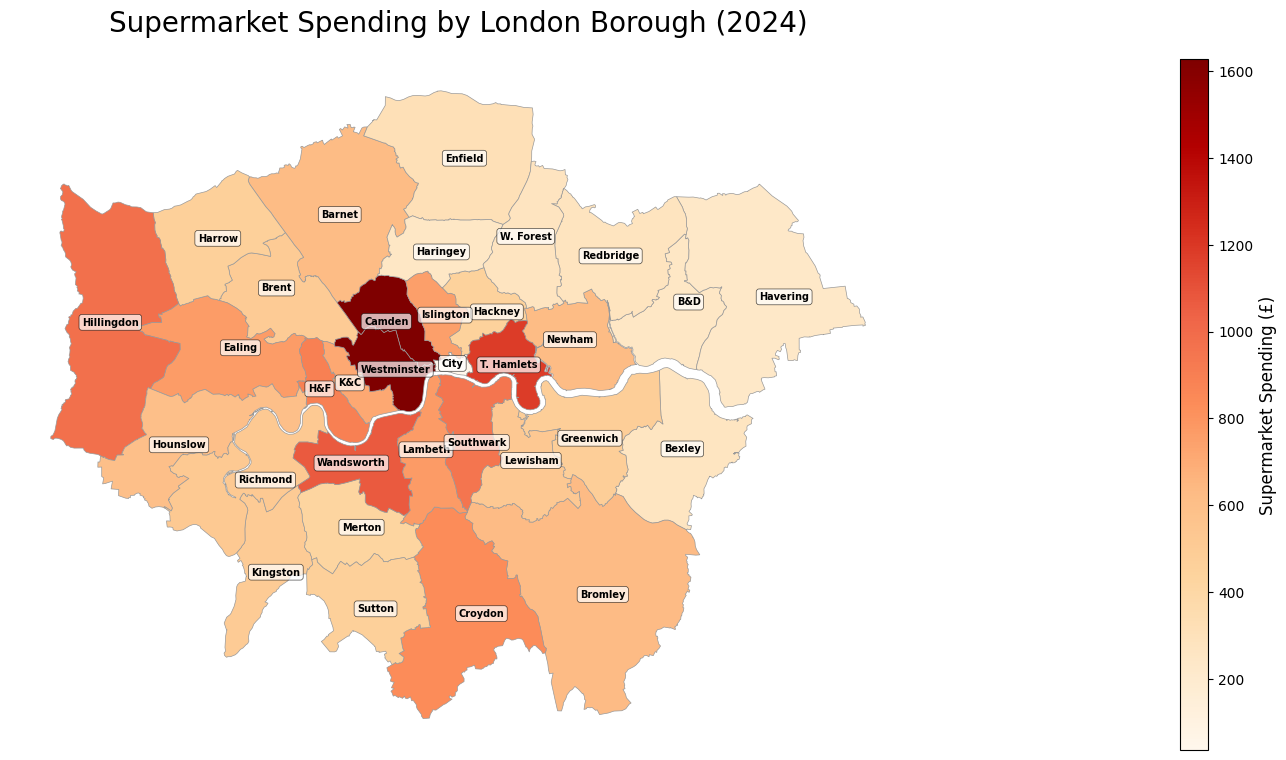

In [136]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Your spending data
boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley",
    "Camden", "City of London", "Croydon", "Ealing", "Enfield",
    "Greenwich", "Hackney", "Hammersmith and Fulham", "Haringey",
    "Harrow", "Havering", "Hillingdon", "Hounslow", "Islington",
    "Kensington and Chelsea", "Kingston upon Thames", "Lambeth",
    "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames",
    "Southwark", "Sutton", "Tower Hamlets", "Waltham Forest",
    "Wandsworth", "Westminster"
]

spending_values = [
    249.55, 623.70, 266.93, 504.57, 628.61, 1627.08, 36.24, 832.83,
    763.69, 317.73, 481.42, 451.62, 894.34, 250.95, 468.56, 236.15,
    975.12, 596.55, 755.53, 714.16, 504.39, 772.13, 530.12, 423.88,
    625.13, 279.99, 523.05, 952.85, 469.89, 1184.48, 274.26, 1070.51, 1626.71
]

# Create a DataFrame for the spending data
spending_df = pd.DataFrame({
    'borough': boroughs,
    'spending': spending_values
})

# Clean borough names in both DataFrames to ensure they match
gdf_london['LAD13NM_clean'] = gdf_london['LAD13NM'].str.lower().str.strip()
spending_df['borough_clean'] = spending_df['borough'].str.lower().str.strip()

# Correct mismatches in borough names
spending_df['borough_clean'] = spending_df['borough_clean'].replace({
    'hammersmith and fulham': 'hammersmith and fulham',
})

gdf_london['LAD13NM_clean'] = gdf_london['LAD13NM_clean'].replace({
    'city of london corporation': 'city of london',
    'westminster city council': 'westminster',
})

# Merge the spending data with the GeoDataFrame
merged_df = gdf_london.merge(
    spending_df,
    left_on='LAD13NM_clean',
    right_on='borough_clean'
)

# Create abbreviations for boroughs
borough_abbr = {
    'Barking and Dagenham': 'B&D',
    'Barnet': 'Barnet',
    'Bexley': 'Bexley',
    'Brent': 'Brent',
    'Bromley': 'Bromley',
    'Camden': 'Camden',
    'City of London': 'City',
    'Croydon': 'Croydon',
    'Ealing': 'Ealing',
    'Enfield': 'Enfield',
    'Greenwich': 'Greenwich',
    'Hackney': 'Hackney',
    'Hammersmith and Fulham': 'H&F',
    'Haringey': 'Haringey',
    'Harrow': 'Harrow',
    'Havering': 'Havering',
    'Hillingdon': 'Hillingdon',
    'Hounslow': 'Hounslow',
    'Islington': 'Islington',
    'Kensington and Chelsea': 'K&C',
    'Kingston upon Thames': 'Kingston',
    'Lambeth': 'Lambeth',
    'Lewisham': 'Lewisham',
    'Merton': 'Merton',
    'Newham': 'Newham',
    'Redbridge': 'Redbridge',
    'Richmond upon Thames': 'Richmond',
    'Southwark': 'Southwark',
    'Sutton': 'Sutton',
    'Tower Hamlets': 'T. Hamlets',
    'Waltham Forest': 'W. Forest',
    'Wandsworth': 'Wandsworth',
    'Westminster': 'Westminster'
}

# Map abbreviations to the merged DataFrame
merged_df['borough_abbr'] = merged_df['borough'].map(borough_abbr)

# Ensure the merge was successful
if merged_df.empty:
    print("Merge resulted in an empty DataFrame. Please check for mismatched borough names.")
else:
    # Create figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the map without automatic legend
    merged_df.plot(
        column='spending',
        cmap='OrRd',
        linewidth=0.5,
        ax=ax,
        edgecolor='0.6',
        legend=False  # Disable the automatic legend
    )

    # Remove axis for a cleaner look
    ax.axis('off')

    # Add a title
    ax.set_title('Supermarket Spending by London Borough (2024)', fontdict={'fontsize': 20}, pad=20)

    # Calculate centroid coordinates for annotations
    merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[0])

    # Annotate boroughs with abbreviations
    for idx, row in merged_df.iterrows():
        plt.annotate(
            row['borough_abbr'],        # Use the abbreviation
            xy=row['coords'],
            xytext=(0, 0),
            textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='center',
            fontweight='bold',
            fontsize=7,
            color='black',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5, alpha=0.7)
        )

    # Adjust the layout to make space for the colorbar
    plt.subplots_adjust(left=0.01, right=0.99, top=0.97, bottom=0.01)

    # Create colorbar on the right side
    # Adjust the position of the colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.02)  # Reduced pad from 0.1 to 0.02

    # Normalize the color scale
    vmin = merged_df['spending'].min()
    vmax = merged_df['spending'].max()
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []  # Dummy array for the scalar mappable

    # Add the colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('Supermarket Spending (£)', fontsize=12)

    # Adjust colorbar tick label font size
    cbar.ax.tick_params(labelsize=10)

    # Display the map
    plt.show()
